In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("E:/Customer-Churn/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.drop(columns=["customerID"],inplace=True)

In [6]:
categorial_columns=df.select_dtypes(include="object").columns
print("Categorial Columns", categorial_columns)

Categorial Columns Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
for column in categorial_columns:
    print(f"\n{column}: {df[column].unique()}")


gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']


In [8]:
for column in ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]:
    df[column] = df[column].map({"No internet service": "No"}).fillna(df[column])

In [9]:
df["MultipleLines"]=df["MultipleLines"].map({"No phone service":"No"}).fillna(df["MultipleLines"])

In [10]:
for column in categorial_columns:
    print(f"\n{column}: {df[column].unique()}")


gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['No' 'Yes']

StreamingTV: ['No' 'Yes']

StreamingMovies: ['No' 'Yes']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']


In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",None)

In [12]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [13]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [14]:
df_1=df.copy()

In [15]:
df_1=pd.get_dummies(df_1,drop_first=True)

In [16]:
df_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [17]:
boolean_columns=df_1.select_dtypes(include="bool").columns
df_1[boolean_columns]=df_1[boolean_columns].astype(int)

In [18]:
df_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


In [19]:
df=df_1.copy()

In [20]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   int64  
 5   Partner_Yes                            7043 non-null   int64  
 6   Dependents_Yes                         7043 non-null   int64  
 7   PhoneService_Yes                       7043 non-null   int64  
 8   MultipleLines_Yes                      7043 non-null   int64  
 9   InternetService_Fiber optic            7043 non-null   int64  
 10  InternetService_No                     7043 non-null   int64  
 11  Onli

<Axes: >

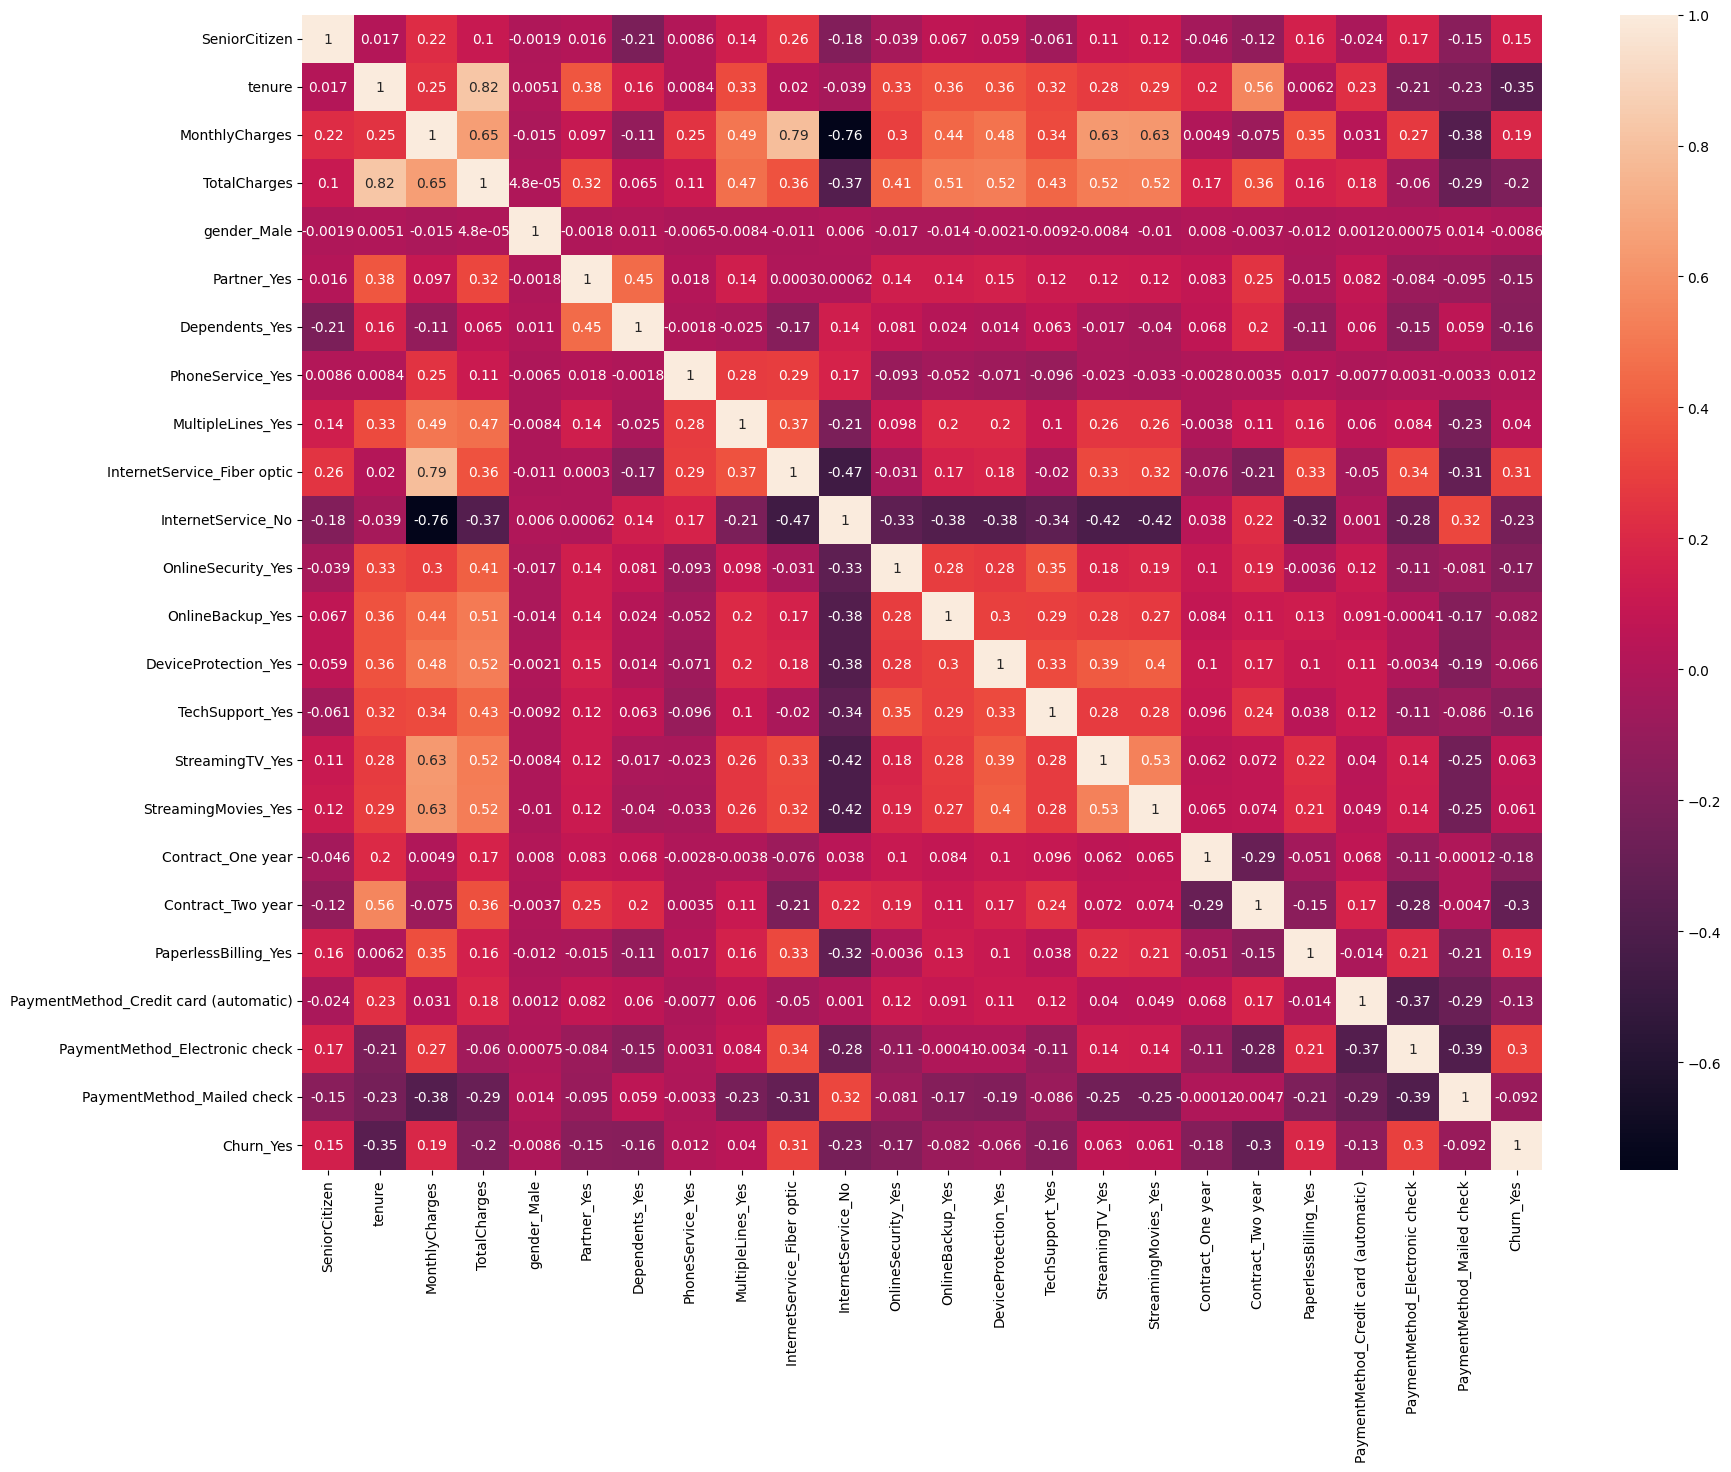

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric features
X = df.select_dtypes(include=['float64', 'int64'])
orig_cols = X.columns.tolist()

# Add constant for intercept and convert to DataFrame
X = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns # type: ignore
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # type: ignore

print(vif_data)


                                  Feature         VIF
0                                   const  629.526978
1                           SeniorCitizen    1.155267
2                                  tenure    7.320128
3                          MonthlyCharges  865.064571
4                            TotalCharges   10.615125
5                             gender_Male    1.002170
6                             Partner_Yes    1.462802
7                          Dependents_Yes    1.384797
8                        PhoneService_Yes   34.862075
9                       MultipleLines_Yes    7.280272
10            InternetService_Fiber optic  148.341914
11                     InternetService_No  104.259195
12                     OnlineSecurity_Yes    6.338762
13                       OnlineBackup_Yes    6.783602
14                   DeviceProtection_Yes    6.922460
15                        TechSupport_Yes    6.470117
16                        StreamingTV_Yes   24.063737
17                    Stream

In [25]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=["Churn_Yes"])
y=df["Churn_Yes"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,f1_score

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
THREE_SHOULD=0.3

In [31]:
prob=rf.predict_proba(X_test)[:,1]
prob

array([0.71, 0.05, 0.  , ..., 0.03, 0.02, 0.55], shape=(1409,))

In [32]:
pred=(prob >=THREE_SHOULD).astype(int)
pred

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.55      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



In [37]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)
prob=xgb.predict_proba(X_test)[:,1]
xgb_pred=(prob >=THREE_SHOULD).astype(int)
print(classification_report(y_test,xgb_pred))


              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1036
           1       0.54      0.72      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THREE_SHOULD).astype(int) 
    return recall_score(y_test, y_pred, pos_label=1) 

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-11-15 23:31:51,916] A new study created in memory with name: no-name-a6138887-a277-4f30-b5ab-de369dfbfa6c
[I 2025-11-15 23:31:52,606] Trial 0 finished with value: 0.8847184986595175 and parameters: {'n_estimators': 758, 'learning_rate': 0.12665027921470776, 'max_depth': 5, 'subsample': 0.6978315399182007, 'colsample_bytree': 0.8330022871955282, 'min_child_weight': 1, 'gamma': 2.631407190212052, 'reg_alpha': 0.059532026902049395, 'reg_lambda': 2.90170865047056}. Best is trial 0 with value: 0.8847184986595175.
[I 2025-11-15 23:31:53,192] Trial 1 finished with value: 0.9088471849865952 and parameters: {'n_estimators': 438, 'learning_rate': 0.06429261127049635, 'max_depth': 9, 'subsample': 0.605978950229376, 'colsample_bytree': 0.5205921129050556, 'min_child_weight': 7, 'gamma': 2.2555426109577557, 'reg_alpha': 3.3220273790285844, 'reg_lambda': 2.788713470956363}. Best is trial 1 with value: 0.9088471849865952.
[I 2025-11-15 23:31:53,538] Trial 2 finished with value: 0.922252010723

Best Params: {'n_estimators': 301, 'learning_rate': 0.014110709747776867, 'max_depth': 3, 'subsample': 0.8900844373220796, 'colsample_bytree': 0.9983973969797624, 'min_child_weight': 7, 'gamma': 4.927792303188303, 'reg_alpha': 2.995553358689092, 'reg_lambda': 1.6919599489048767}
Best Recall: 0.9436997319034852


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train,y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THREE_SHOULD).astype(int) 
    return recall_score(y_test, y_pred, pos_label=1) 

# Run tuning
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30) # type: ignore

print("Best Params:", study.best_params)

# Train best model
best_rf = RandomForestClassifier(**study.best_params)
best_rf.fit(X_train, y_train)


[I 2025-11-15 23:37:42,563] A new study created in memory with name: no-name-65de9f83-af06-4d47-ac8d-297e04de4962
[I 2025-11-15 23:37:44,950] Trial 0 finished with value: 0.7828418230563002 and parameters: {'n_estimators': 441, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.7828418230563002.
[I 2025-11-15 23:37:45,466] Trial 1 finished with value: 0.806970509383378 and parameters: {'n_estimators': 162, 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.806970509383378.
[I 2025-11-15 23:37:46,658] Trial 2 finished with value: 0.8016085790884718 and parameters: {'n_estimators': 348, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.806970509383378.
[I 2025-11-15 23:37:49,066] Trial 3 finished with value: 0.7774798927613941 an

Best Params: {'n_estimators': 394, 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}


,n_estimators,394
,criterion,'gini'
,max_depth,6
,min_samples_split,11
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False
